# Introduction to the Experiment

The KNN experiment investigates the effect of \(K\), which represents the number of nearest neighbors considered, on classification performance. Adjusting \(K\) directly impacts the decision boundary of the model. The experiment aims to find the optimal range of \(K\) for achieving the best classification accuracy.

The experiment will use 5-fold cross-validation to evaluate the accuracy.


# Dataset

This experiment is based on the **Iris.data** dataset, which is a classic dataset widely used in pattern recognition and machine learning. The dataset was introduced by British statistician and biologist Ronald A. Fisher in 1936. The Iris dataset contains 150 samples from three different species of iris flowers, with 50 samples for each species. The species are: 
- **Iris-setosa**
- **Iris-versicolor**
- **Iris-virginica**. 

Each sample includes four features describing the morphological characteristics of the flowers:
- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

All four features are measured in centimeters. Each sample in the dataset is associated with a **class label** representing the species of the iris flower.

In [3]:
import numpy as np
import pandas as pd
import random
import timeit
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')

## Computing Distance

In [4]:
# calculate distance function
def cal_distance(test, cal):
    label_distance_list = []  # list of label and distance
    for i in range(len(cal)):
        label_distance = [cal[i][4]]
        d = np.array(test[:4]) - np.array(cal[i][:4])  # test sample value-training sample value
        label_distance.append(np.linalg.norm(d))  # calculate distance
        label_distance_list.append(label_distance)
    return label_distance_list

## Separating Data to Train Set and Test Set

In [5]:
def separate_data(ind, datalist):  # Method to separate the dataset into five parts for 5-fold cross validation
    length = int(len(datalist) / 5)  # Cutting length of the list
    data = [datalist[i * length:(i + 1) * length] for i in range(5)]

    # According to the index, the test set will be chosen among the five subsets
    test = data[ind]
    train = [item for i, subset in enumerate(data) if i != ind for item in subset]
    return train, test

## Main Part

In [6]:
iris_data = pd.read_csv("iris.data", header=None)
labels_codes = pd.Categorical(iris_data[4]).codes
for i in range(150):
    iris_data.loc[i, 4] = labels_codes[i]
datalist = iris_data.values.tolist()
random.seed(17)
random.shuffle(datalist)

average_acc = []
k_list = []

start = timeit.default_timer()  # Start timer to count the running time of KNN Method
#  test different K values:
for K in range(1, 120):
    if K % 3 != 0:
        # for visualization
        k_list.append(K)
        accuracy = []
        # implementing 5-fold training process:
        for i in range(5):
            cal_data, test_data = separate_data(i, datalist)  # split training and testing set
            # doing KNN
            right = 0
            for x in range(len(test_data)):
                d_set = np.array(cal_distance(test_data[x], cal_data))  # list of distance
                d_set = d_set[d_set[:, 1].argsort()]  # sort distance list
                p_wk = [0, 0, 0]  # be used to record P(wk|x)
                # calculate P(wk|x) for each test sample
                for y in range(K):
                    if int(d_set[y, 0]) == 0:
                        p_wk[0] = p_wk[0] + 1 / K
                    elif int(d_set[y, 0]) == 1:
                        p_wk[1] = p_wk[1] + 1 / K
                    else:
                        p_wk[2] = p_wk[2] + 1 / K

                # calculate accuracy
                if p_wk.index(max(p_wk)) == test_data[x][4]:
                    right += 1
                    # right = right + 1
            accuracy.append(right / len(test_data))
        accuracy = np.array(accuracy)
        average_acc.append(np.mean(accuracy))
        print(f'Average accuracy of 5-fold cross-validation when K = {K} : {np.mean(accuracy)}')
        print('--------------------------------------------------------------------------------')

stop = timeit.default_timer()  # Stop timer for the running time of KNN algortihm
print(f'Running time of Parzen Window with 5-fold cross validation: {stop - start}\n')

Average accuracy of 5-fold cross-validation when K = 1 : 0.96
--------------------------------------------------------------------------------
Average accuracy of 5-fold cross-validation when K = 2 : 0.9466666666666667
--------------------------------------------------------------------------------
Average accuracy of 5-fold cross-validation when K = 4 : 0.96
--------------------------------------------------------------------------------
Average accuracy of 5-fold cross-validation when K = 5 : 0.9733333333333333
--------------------------------------------------------------------------------
Average accuracy of 5-fold cross-validation when K = 7 : 0.9800000000000001
--------------------------------------------------------------------------------
Average accuracy of 5-fold cross-validation when K = 8 : 0.9800000000000001
--------------------------------------------------------------------------------
Average accuracy of 5-fold cross-validation when K = 10 : 0.96
-----------------------

## Visualization of Average Accuracy of K

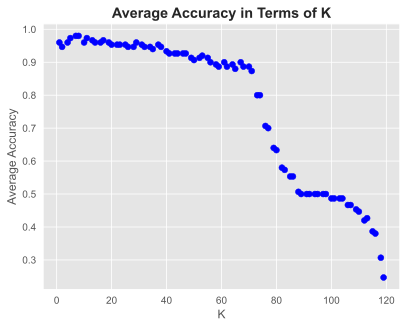

In [17]:
plt.scatter(k_list, average_acc, color='blue')
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy in Terms of K', fontweight='bold')
plt.show()

## Print Best Result

In [9]:
k_max_list = []
for z in range(len(average_acc)):
    if average_acc[z] == max(average_acc):
        k_max_list.append(k_list[z])

print(f'Highest average accuracy: {max(average_acc):.2f}')
print(f'Corresponding K: {k_max_list}')

Highest average accuracy: 0.98
Corresponding K: [7, 8]
